#### Nombre: **08_model_evaluation**
#### Autores: _Sergio Cañón  Laiz y Ignacio Ruiz de Zuazu Echavarría_
#### CUNEF
#### 15/01/2021


En este notebook comparamos los mdoelos con diferentes métricas en su configuración por defecto. Hemos llegado a la conclusión de:
* El optimizador Adam obtiene mejores resultados que el SGD
* El optmizador SGD necesita más epochs que el Adam
* Los modelos elegidos son aquellos con el optimizador Adam

In [1]:
# importamos librerías 

import numpy as np  # álgebra lineal
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import glob  # pathnames
import cv2  # lectura y procesamiento de las imagenes

import matplotlib.pyplot as plt  # gráficos
import matplotlib.image as mpimg

import os  # lectura de directorios

import keras 
from keras.layers import *
from keras.models import *
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras import optimizers
import time #tiempos de ejecución
from random import shuffle
from keras.preprocessing import image
import imageio


from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.applications.resnet50 import preprocess_input
import json

# RAZA

In [6]:
# importamos el test

x_test = np.load(r'..\labUTKfaces\data\06_train_test_array\x_test_raza.npy')
y_test = np.load(r'..\labUTKfaces\data\06_train_test_array\y_test_raza.npy')

## SGD

In [ ]:
#  cargamos el modelo 

model_raza_sgd = tf.keras.models.load_model("..\labUTKfaces\models\model_sgd_race_rgb.h")

In [285]:
# Evaluate the model on test set
score_model_raza_sgd = model_raza_sgd.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_raza_sgd[0])
print('\n', 'val_accuracy:', round(score_model_raza_sgd[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_raza_sgd[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_raza_sgd[3]*100,2)," %")


 val_loss: 1.3339651823043823

 val_accuracy: 45.96  %

 val_AUC: 76.1  %

 val_categorical_accuracy: 45.96  %


In [18]:
#cargamos la historia de lso indicadores

model_raza_sgd_history = json.load(open("model_sgd_race_rgb_history.json", 'r'))

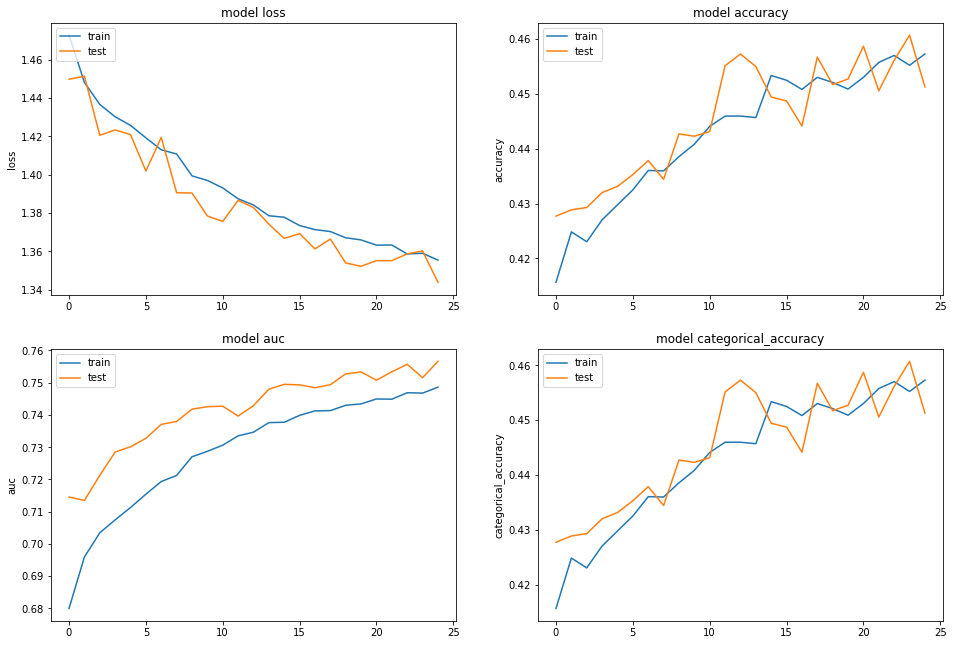

In [54]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_raza_sgd_history['loss'])
ax1.plot(model_raza_sgd_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_raza_sgd_history['accuracy'])
ax2.plot(model_raza_sgd_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_raza_sgd_history['auc'])
ax3.plot(model_raza_sgd_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_raza_sgd_history['categorical_accuracy'])
ax3.plot(model_raza_sgd_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

## ADAM

In [7]:
#  cargamos el modelo 

model_adam_race = tf.keras.models.load_model("..\models\model_adam_race.h")

In [286]:
# Evaluate the model on test set
score_model_adam_race = model_adam_race.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_adam_race[0])
print('\n', 'val_accuracy:', round(score_model_adam_race[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_adam_race[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_adam_race[3]*100,2)," %")


 val_loss: 1.1882883310317993

 val_accuracy: 54.57  %

 val_AUC: 82.95  %

 val_categorical_accuracy: 54.57  %


In [83]:
#  cargamos la historia de las metricas 

model_adam_race_history = json.load(open("model_adam_race_history.json", 'r'))

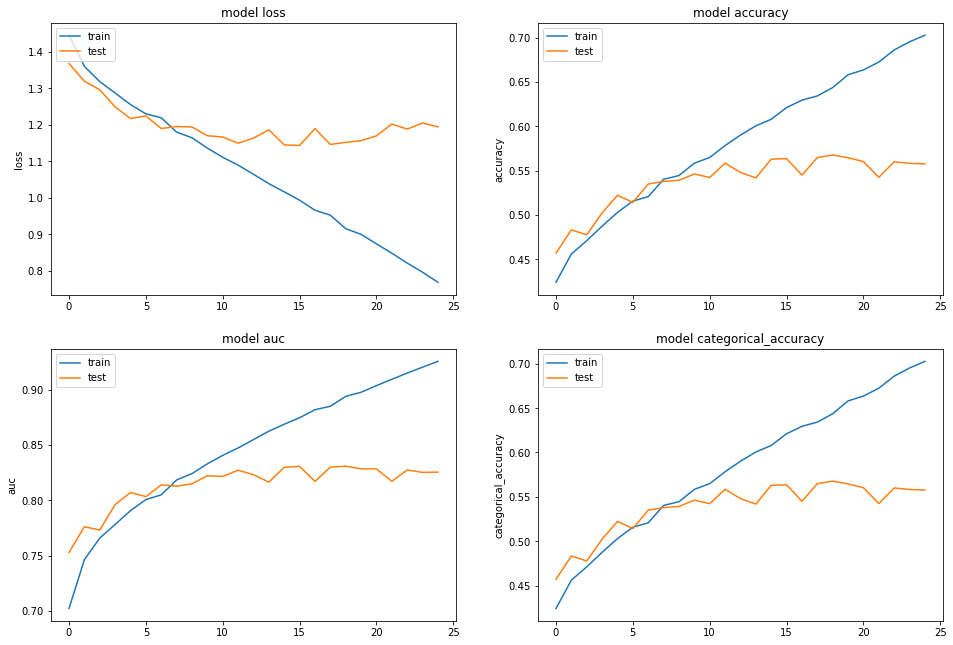

In [84]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_adam_race_history['loss'])
ax1.plot(model_adam_race_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_adam_race_history['accuracy'])
ax2.plot(model_adam_race_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_adam_race_history['auc'])
ax3.plot(model_adam_race_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_adam_race_history['categorical_accuracy'])
ax3.plot(model_adam_race_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

# GÉNERO

## SGD

In [23]:
x_test = np.load('x_test_genero.npy')
y_test = np.load('y_test_genero.npy')

In [8]:
#  cargamos el modelo 

model_sgd_gender_rgb = tf.keras.models.load_model("..\models\model_sgd_gender_rgb.h")

In [282]:
# Evaluate the model on test set
score_model_sgd_gender_rgb = model_sgd_gender_rgb.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_sgd_gender_rgb[0])
print('\n', 'val_accuracy:', round(score_model_sgd_gender_rgb[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_sgd_gender_rgb[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_sgd_gender_rgb[3]*100,2)," %")


 val_loss: 0.6064868569374084

 val_accuracy: 66.38  %

 val_AUC: 73.42  %

 val_categorical_accuracy: 66.38  %


In [73]:
#  cargamos las métricas del modelos 

model_genero_sgd_history = json.load(open("model_sgd_gender_history.json", 'r'))

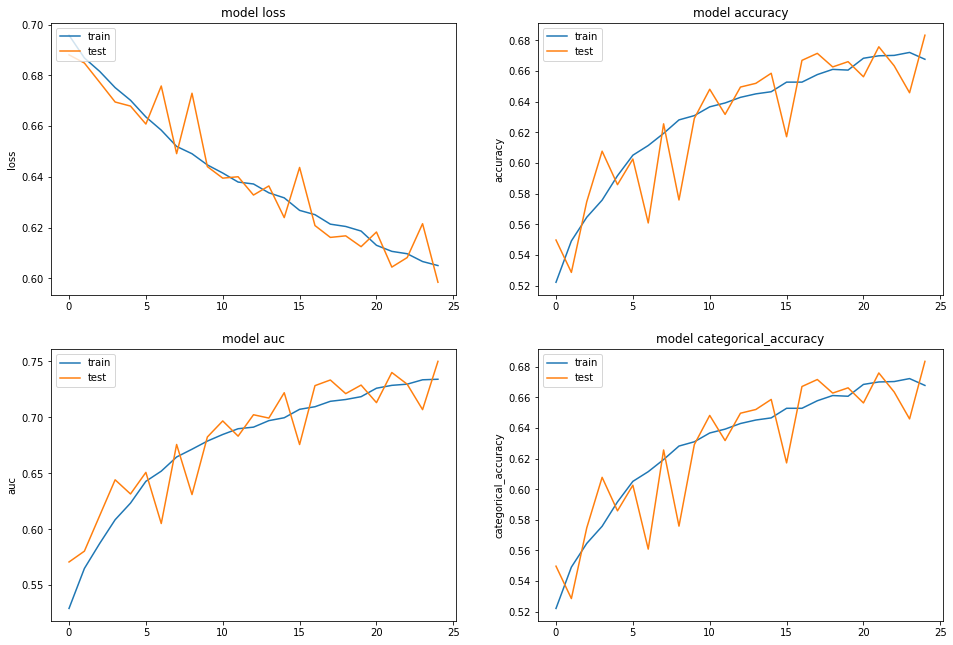

In [74]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_genero_sgd_history['loss'])
ax1.plot(model_genero_sgd_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_genero_sgd_history['accuracy'])
ax2.plot(model_genero_sgd_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_genero_sgd_history['auc'])
ax3.plot(model_genero_sgd_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_genero_sgd_history['categorical_accuracy'])
ax3.plot(model_genero_sgd_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

## ADAM

In [9]:
#  cargamos el modelo 


model_adam_gender_rgb = tf.keras.models.load_model("..\models\model_adam_gender_rgb.h")

In [283]:
# Evaluate the model on test set
score_model_adam_gender_rgb = model_adam_gender_rgb.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_adam_gender_rgb[0])
print('\n', 'val_accuracy:', round(score_model_adam_gender_rgb[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_adam_gender_rgb[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_adam_gender_rgb[3]*100,2)," %")


 val_loss: 0.5170464515686035

 val_accuracy: 77.33  %

 val_AUC: 85.17  %

 val_categorical_accuracy: 77.33  %


In [88]:
#  cargamos las métricas del modelo 


model_adam_gender_history = json.load(open("model_adam_gender_history.json", 'r'))

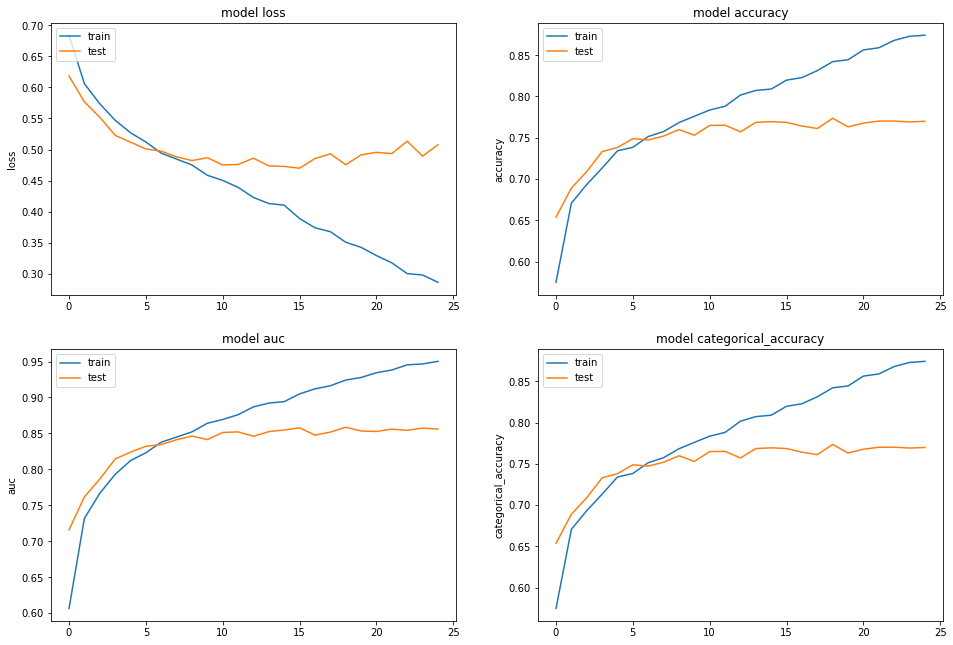

In [89]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_adam_gender_history['loss'])
ax1.plot(model_adam_gender_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_adam_gender_history['accuracy'])
ax2.plot(model_adam_gender_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_adam_gender_history['auc'])
ax3.plot(model_adam_gender_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_adam_gender_history['categorical_accuracy'])
ax3.plot(model_adam_gender_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

# EDAD

In [287]:
x_test = np.load('x_test_edad.npy')
y_test = np.load('y_test_edad.npy')

## SGD

In [10]:
#  cargamos el modelo 


model_sgd_age_rgb = tf.keras.models.load_model("..\models\model_sgd_age_rgb.h")

In [288]:
# Evaluate the model on test set
score_model_sgd_age_rgb = model_sgd_age_rgb.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_sgd_age_rgb[0])
print('\n', 'val_accuracy:', round(score_model_sgd_age_rgb[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_sgd_age_rgb[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_sgd_age_rgb[3]*100,2)," %")


 val_loss: 1.4725193977355957

 val_accuracy: 36.15  %

 val_AUC: 68.06  %

 val_categorical_accuracy: 36.15  %


In [183]:
#  cargamos las métricas del modelo 


model_sgd_age_history = json.load(open("model_sgd_age_history.json", 'r'))

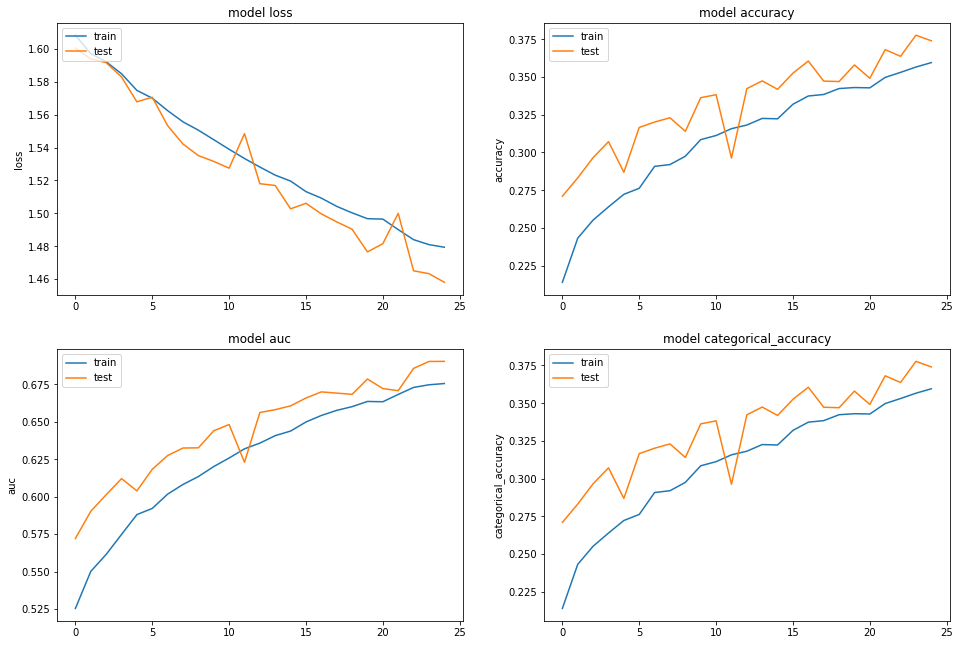

In [79]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_sgd_age_history['loss'])
ax1.plot(model_sgd_age_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_sgd_age_history['accuracy'])
ax2.plot(model_sgd_age_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_sgd_age_history['auc'])
ax3.plot(model_sgd_age_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_sgd_age_history['categorical_accuracy'])
ax3.plot(model_sgd_age_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

## ADAM

In [11]:
#  cargamos el modelo 


model_adam_age = tf.keras.models.load_model("..\models\model_adam_age.h")

In [289]:
# Evaluate the model on test set
score_model_adam_age = model_adam_age.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'val_loss:', score_model_adam_age[0])
print('\n', 'val_accuracy:', round(score_model_adam_age[1]*100,2)," %")
print('\n', 'val_AUC:', round(score_model_adam_age[2]*100,2)," %")
print('\n', 'val_categorical_accuracy:', round(score_model_adam_age[3]*100,2)," %")


 val_loss: 1.3860671520233154

 val_accuracy: 43.76  %

 val_AUC: 75.37  %

 val_categorical_accuracy: 43.76  %


In [94]:
#  cargamos las métricas 


model_adam_age_history = json.load(open("model_adam_age_history.json", 'r'))

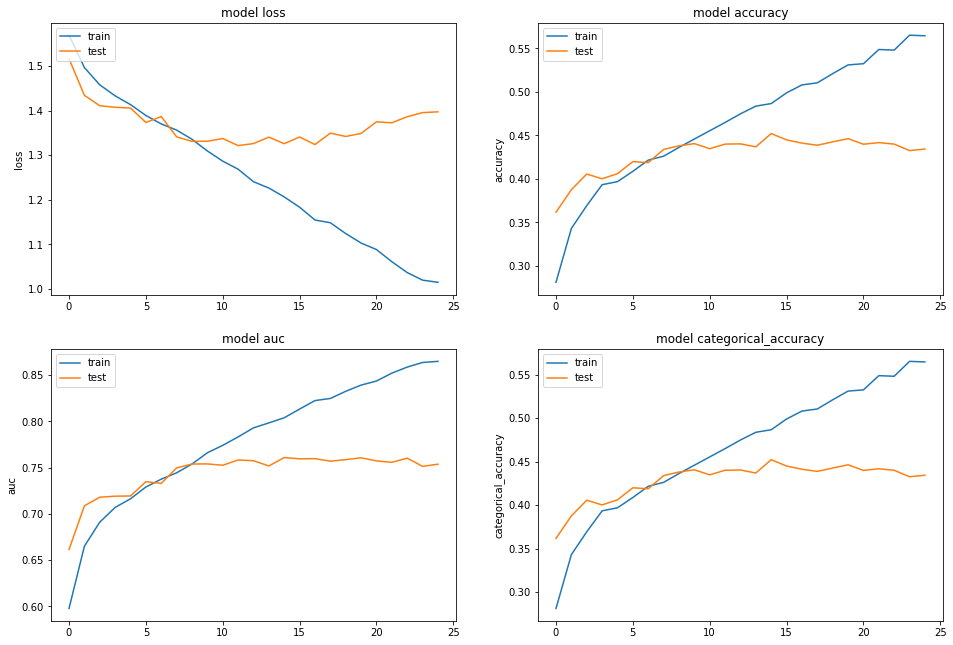

In [95]:
fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(221)
ax1.plot(model_adam_age_history['loss'])
ax1.plot(model_adam_age_history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left')


ax2 = fig.add_subplot(222)
ax2.plot(model_adam_age_history['accuracy'])
ax2.plot(model_adam_age_history['val_accuracy'])
ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(223)
ax3.plot(model_adam_age_history['auc'])
ax3.plot(model_adam_age_history['val_auc'])
ax3.set_title('model auc')
ax3.set_ylabel('auc')
ax3.legend(['train', 'test'], loc='upper left')

ax3 = fig.add_subplot(224)
ax3.plot(model_adam_age_history['categorical_accuracy'])
ax3.plot(model_adam_age_history['val_categorical_accuracy'])
ax3.set_title('model categorical_accuracy')
ax3.set_ylabel('categorical_accuracy')
ax3.legend(['train', 'test'], loc='upper left')


plt.show()

# Score todos los modelos

In [ ]:
row_names =["Val_loss","Val_accuracy","Val_AUC", "Val_categorical_accuracy"]

In [351]:
# comparamos las métricas de los diferentes optimizadores con los parametros en default

d = {'métrica': row_names,'SGD': score_model_raza_sgd, 'ADAM': score_model_adam_race}
raza_metrica = pd.DataFrame(d)
raza_metrica

,métrica,SGD,ADAM
0,Val_loss,1.333965,1.188288
1,Val_accuracy,0.459589,0.545672
2,Val_AUC,0.761004,0.829499
3,Val_categorical_accuracy,0.459589,0.545672


In [352]:
# comparamos las métricas de los diferentes optimizadores con los parametros en default


d = {'métrica': row_names,'SGD': score_model_sgd_age_rgb, 'ADAM': score_model_adam_age}
edad_metrica = pd.DataFrame(d)
edad_metrica

,métrica,SGD,ADAM
0,Val_loss,1.472519,1.386067
1,Val_accuracy,0.361549,0.437590
2,Val_AUC,0.680586,0.753701
3,Val_categorical_accuracy,0.361549,0.437590


In [355]:
# comparamos las métricas de los diferentes optimizadores con los parametros en default

d = {'métrica': row_names,'SGD': score_model_sgd_gender_rgb, 'ADAM': score_model_adam_gender_rgb}
genero_metrica = pd.DataFrame(d)
genero_metrica

,métrica,SGD,ADAM
0,Val_loss,0.606487,0.517046
1,Val_accuracy,0.663797,0.773314
2,Val_AUC,0.734172,0.851658
3,Val_categorical_accuracy,0.663797,0.773314


En todos los modelos, el optimizador Adam tiene mayor accuracy y AUC por lo que seleccionamos los modelos Adam al modelo definitivo.

Cabe decir que en los gráficos del optimizador SGD no se ve un overfitting por lo que se podría añadir más epochs y ver si supera al Adam como modelo con amyor val_accuracy

# Evaluación con imágenes nuevas

In [ ]:
def edad_genero_raza(img_path, modelo_edad, modelo_genero, modelo_raza):
    from tensorflow.keras.preprocessing import image
    
    imagen = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(32, 32))
    imagenes = (plt.imshow(imagen), plt.show())
    
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    
    
    prediction_edad = modelo_edad.predict(img_preprocessed)
    classes_edad = np.argmax(prediction_edad)    
    if classes_edad == 0:
        edad = print("Menor a 19 años")        
    if classes_edad == 1:
        edad = print("Mayor a 19 y  menor o igual a 26 años")
    if classes_edad == 2:
        edad = print("Mayor a 26 y menor de 34 años")
    if classes_edad == 3:
        edad = print("Mayor o igual a 34 años y menor de 50 años")
    if classes_edad == 4:
        edad = print("Mayor de 50 años")
        
    
    
    prediction_genero = modelo_genero.predict(img_preprocessed)
    classes_genero = np.argmax(prediction_genero)    
    if classes_genero == 0:
        genero =  print("Género: Hombre")
    if classes_genero == 1:
        genero = print("Género: Mujer")
    
    
    prediction_raza = modelo_raza.predict(img_preprocessed)
    classes_raza = np.argmax(prediction_raza)
    
    if classes_raza == 0:
        raza = print("Raza blanca")
    if classes_raza == 1:
        raza = print("Raza negra")
    if classes_raza == 2:
        raza = print("Raza asiática")
    if classes_raza == 3:
        raza = print("Raza india")
    if classes_raza == None:
        raza = print("Otra raza")
    
    
    return imagenes, edad, genero, raza

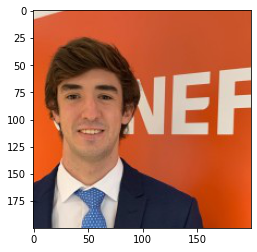

Mayor a 19 y  menor o igual a 26 años
Género: Hombre
Raza blanca


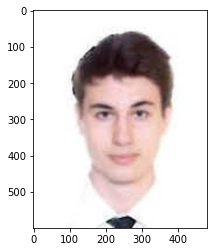

Menor a 19 años
Género: Hombre
Raza asiática


((<matplotlib.image.AxesImage at 0x1ed48174250>, None), None, None, None)

In [367]:
edad_genero_raza("../04_autores/ignacio.jpg",model_adam_age, model_adam_gender_rgb, model_adam_race)
edad_genero_raza("../04_autores/yo_5.jpg",model_adam_age, model_adam_gender_rgb, model_adam_race)